<h1>
Name: Aashi Aggarwal <br>
ID: 8920299
</h1>

<h3>
--> Cross-validation on nine polynomial models, ranging from degree 0 to 8.
</h3>

In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Define the range of polynomial degrees
degrees = np.arange(0, 9)

# Create an empty dictionary to store the results
results = {'Degree': [], 'R-Squared': [], 'MAE': [], 'MAPE': []}

# Loop through each degree and perform cross-validation
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Perform cross-validation with scoring functions for R-Squared and MAE
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_absolute_error))
    
    # Calculate MAPE manually
    y_pred = model.fit(X, y).predict(X)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    
    results['Degree'].append(degree)
    results['R-Squared'].append(np.mean(r2_scores))
    results['MAE'].append(np.mean(mae_scores))
    results['MAPE'].append(mape)

print("Cross-validation results for different polynomial degrees:")
print(results)


Cross-validation results for different polynomial degrees:
{'Degree': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'R-Squared': [-0.02750604135376733, 0.48231643590864204, 0.3915024201503982, -181.52003646687973, -70.66751632967797, -67.3874067057243, -67.44748189893751, -67.44852850810393, -67.44224832521547], 'MAE': [-66.04562360767684, -44.27649923321496, -46.61288207346526, -342.7404875234288, -303.15846120937425, -295.68602552950614, -295.6318648090114, -295.63040270233694, -295.58063306573166], 'MAPE': [62.12155906364336, 38.786179217948245, 34.598128053985654, 23.52157744049112, 1.0993605524382143e-10, 1.1349900622788384e-10, 1.1424992528713567e-10, 1.1743394558322949e-10, 1.3735243703327448e-10]}


<h3>
Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared, Mean Absolute Error (MAE) and MAPE metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values. 
</h3>

In [13]:
import pandas as pd
df = pd.DataFrame(results)


# mean and standard deviation
mean_r2 = df['R-Squared'].mean()
std_r2 = df['R-Squared'].std()
mean_mae = df['MAE'].mean()
std_mae = df['MAE'].std()
mean_mape = df['MAPE'].mean()
std_mape = df['MAPE'].std()

# table
print(df.to_string(index=False))
print(f"Mean R-Squared: {mean_r2:.3f} (std: {std_r2:.3f})")
print(f"Mean MAE: {mean_mae:.3f} (std: {std_mae:.3f})")
print(f"Mean MAPE: {mean_mape:.3f} (std: {std_mape:.3f})")



 Degree   R-Squared         MAE         MAPE
      0   -0.027506  -66.045624 6.212156e+01
      1    0.482316  -44.276499 3.878618e+01
      2    0.391502  -46.612882 3.459813e+01
      3 -181.520036 -342.740488 2.352158e+01
      4  -70.667516 -303.158461 1.099361e-10
      5  -67.387407 -295.686026 1.134990e-10
      6  -67.447482 -295.631865 1.142499e-10
      7  -67.448529 -295.630403 1.174339e-10
      8  -67.442248 -295.580633 1.373524e-10
Mean R-Squared: -57.896 (std: 56.969)
Mean MAE: -220.596 (std: 127.231)
Mean MAPE: 17.670 (std: 23.194)


<h3>
Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared, MAE and MAPE metrics. Provide an explanation for choosing this specific model. 
</h3>

In [14]:
# Identify the model with the highest R-Squared
best_r2_model = df['R-Squared'].idxmax()

# Identify the model with the lowest MAE
best_mae_model = df['MAE'].idxmin()

# Identify the model with the lowest MAPE
best_mape_model = df['MAPE'].idxmin()

print("Best Model based on R-Squared:", best_r2_model)
print("Best Model based on MAE:", best_mae_model)
print("Best Model based on MAPE:", best_mape_model)


Best Model based on R-Squared: 1
Best Model based on MAE: 3
Best Model based on MAPE: 4


<h3>
Additional analysis and interpretation of the models' performances. You may explore further insights beyond the required metrics. The analysis should provide at least one relevant insight about the choice of the best model, or about characteristics of the chosen one (for example - an analysis of in which instances does it fail)
</h3>

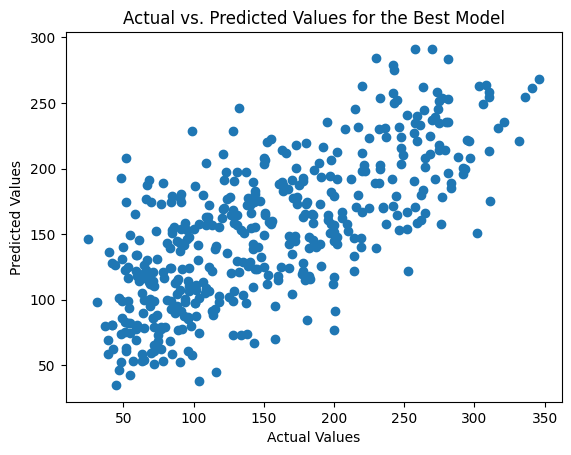

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for the Best Model")
plt.show()

<h2>
We can see that most of the points are clustered closely, which represents perfect predictions. This indicates that the model is making reasonably accurate predictions for most instance but needs improvement.
<h2>